In [1]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,0,0,1,1,1,0,0,1]
y_pred = [0,0,0,0,0,0,0,1,1,1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


In [2]:
confusion_matrix(y_true, y_pred, labels=[0,1])

array([[4, 2],
       [3, 1]])

In [3]:
tn, fp, fn, tp

(np.int64(4), np.int64(2), np.int64(3), np.int64(1))

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

0.5
0.3333333333333333
0.25
0.2857142857142857


In [10]:
y_true = ["cat", "ant", "cat", "cat", "ant","ant"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=['ant', 'cat'])

array([[2, 1],
       [1, 2]])

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ant       0.67      0.67      0.67         3
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



## 머신러닝의 종류

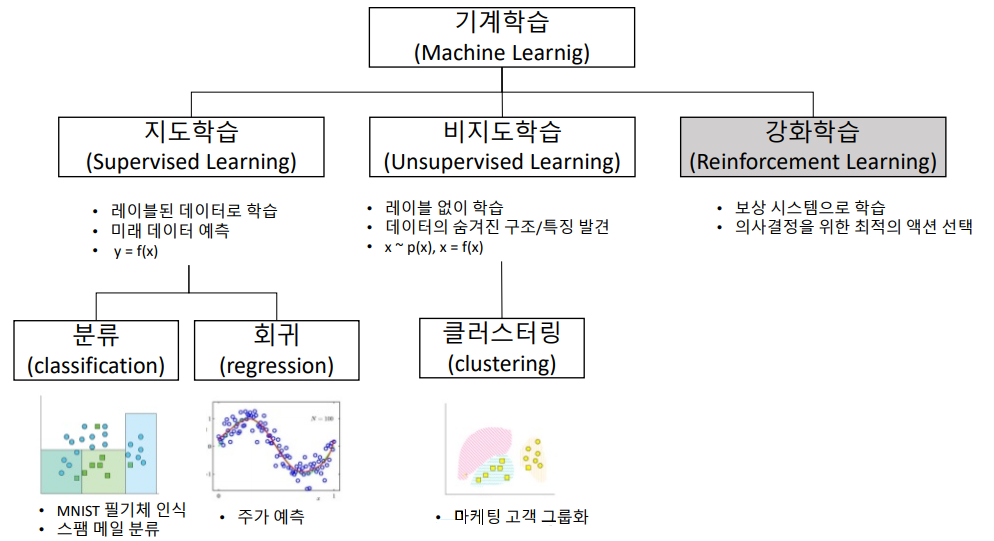

- 이미지 출처 : https://bestpractice80.tistory.com/2

# 분류(Classification)란?

#### 1. 가정해보기

우리는 꽃집을 운영하고 있습니다.    
우리가 가진 데이터는 꽃잎의 길이, 넓이, 꽂받침의 길이와 넓이 데이터입니다.   
이것만으로 꽃의 품종을 구분할 수 있을까요?


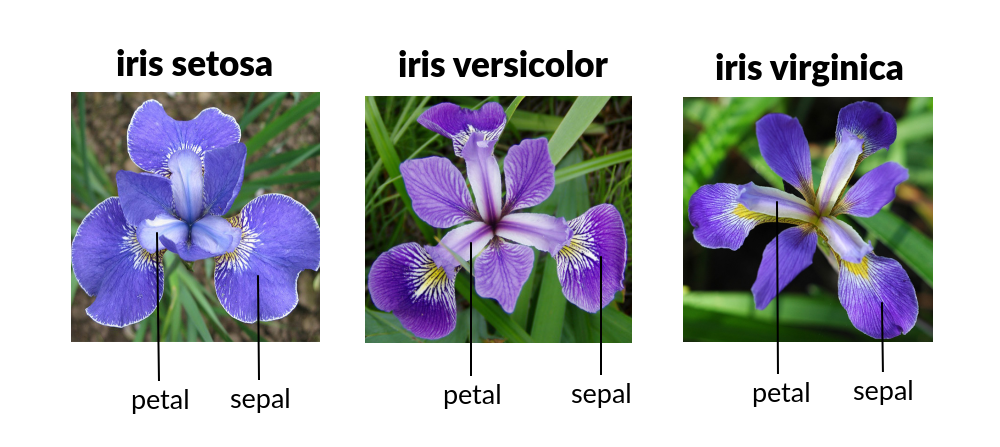

- 문제 정의
    - 데이터 : petal(꽃잎)의 길이, 꽃잎의 넓이, sepal(꽃받침)의 길이, 꽃받침의 넓이에 따른 붓꽃의 품종(Y)
    - 목표 : 데이터에 따른 품종 예측하기
- 해결 방안
    - 분류 알고리즘 활용

- 분류란?
    - 주어진 입력값이 어떤 클래스에 속할지에 대한 결과값을 도출하는 알고리즘
    - 다양한 분류 알고리즘이 존재하며, 예측 목표와 데이터 유형에 따라 적용

## 1. Logistic Regression (로지스틱 회귀)

분류 문제를 회귀 알고리즘으로 풀 수 있을까요?    
일단 가장 간단한 이진분류라고 생각해봅시다.

### 랜덤한 데이터 만들기

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_classes=2, n_features=1, n_redundant=0,
                           n_informative = 1, n_clusters_per_class=1,
                           random_state = 30)

X.shape, y.shape

((100, 1), (100,))

- n_samples : data의 수, 기본값은 100
- n_features : feature의 수, 기본값은 20
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2
- n_classes : 종속변수의 class 수, 기본값은 2 (이진 데이터)
- n_clusters_per_class : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다

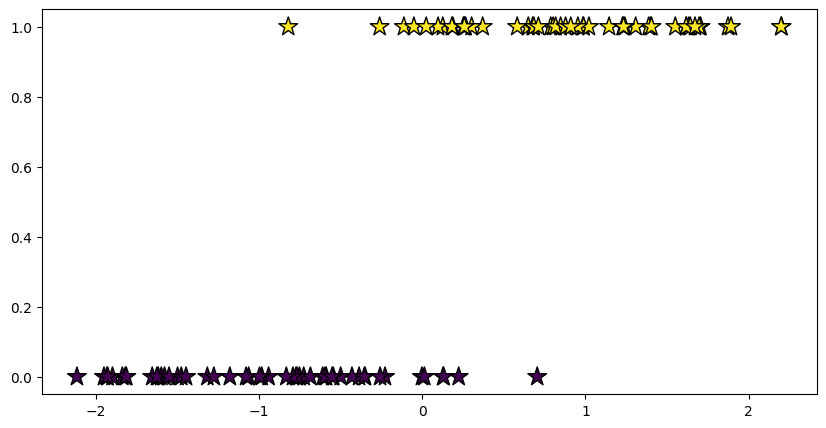

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X, y, c=y, marker= "*", s=200, edgecolors='k')
plt.show()

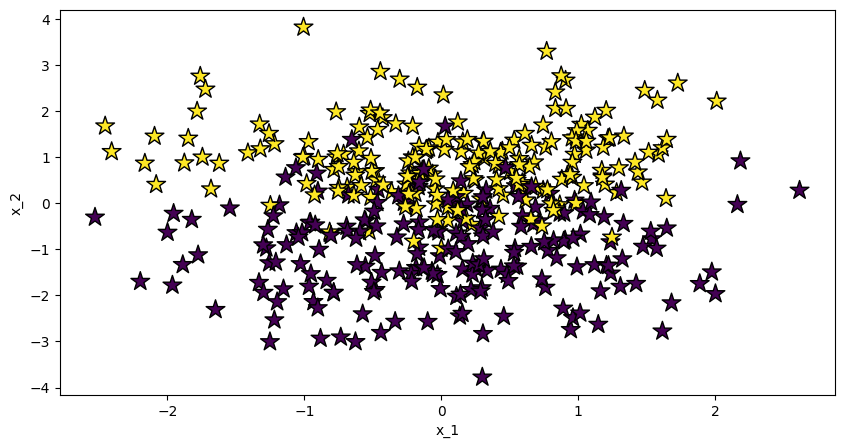

In [21]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 400, n_classes=2, n_features=2, n_redundant=0,
                           n_informative = 1, n_clusters_per_class=1,
                           random_state = 30)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker='*', c=y, s=200, edgecolors='k')
plt.xlabel("x_1")
plt.ylabel('x_2')
plt.show()

### Logistic Regression  기본

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.


- 시그모이드 함수(Sigmoid Function)


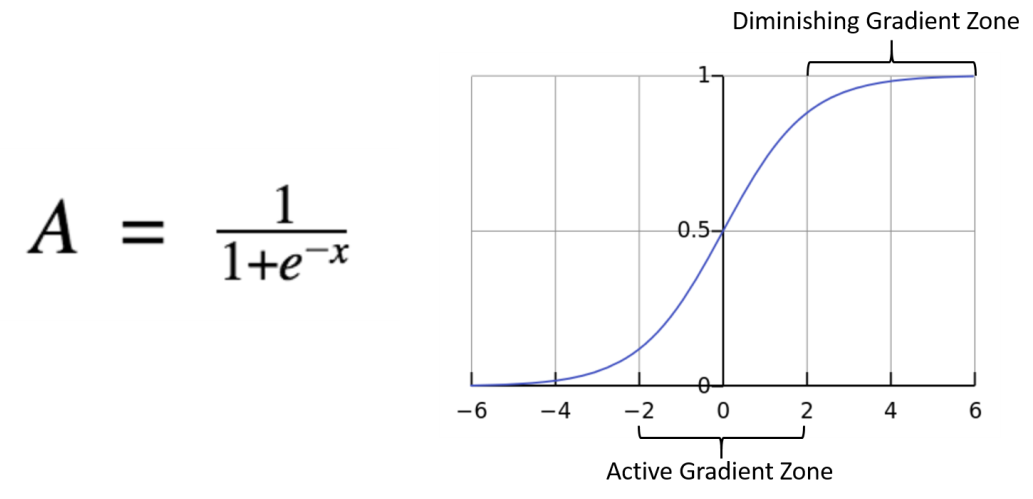

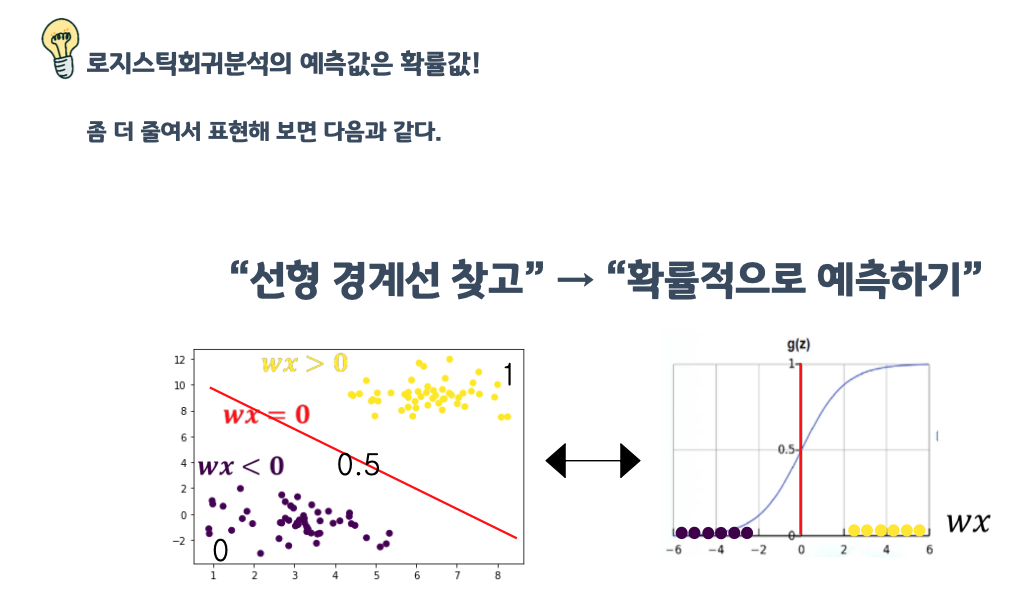

로지스틱 모델 객체를 생성하겠습니다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X,y)

LogisticRegression()

In [25]:
log_reg.predict(X)[:10], y[:10]

(array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]), array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]))

In [26]:
log_reg.coef_, log_reg.intercept_

(array([[0.01821075, 2.55022997]]), array([-0.05268954]))

In [27]:
log_reg.predict(X)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [28]:
log_reg.predict_proba(X)

array([[1.50483584e-01, 8.49516416e-01],
       [5.40122173e-01, 4.59877827e-01],
       [3.89135790e-02, 9.61086421e-01],
       [9.68528935e-01, 3.14710653e-02],
       [8.51230814e-01, 1.48769186e-01],
       [2.28102791e-01, 7.71897209e-01],
       [6.34778938e-05, 9.99936522e-01],
       [7.73070539e-02, 9.22692946e-01],
       [3.50409652e-02, 9.64959035e-01],
       [9.99121735e-01, 8.78265398e-04],
       [2.43331391e-01, 7.56668609e-01],
       [2.64599924e-03, 9.97354001e-01],
       [9.71831094e-01, 2.81689062e-02],
       [5.94672494e-01, 4.05327506e-01],
       [1.55512882e-01, 8.44487118e-01],
       [9.96021049e-01, 3.97895141e-03],
       [9.75972811e-01, 2.40271890e-02],
       [1.66973983e-01, 8.33026017e-01],
       [7.73706013e-01, 2.26293987e-01],
       [3.78626826e-01, 6.21373174e-01],
       [3.45447989e-02, 9.65455201e-01],
       [9.94572766e-01, 5.42723440e-03],
       [9.66783686e-02, 9.03321631e-01],
       [8.88809607e-01, 1.11190393e-01],
       [1.143590

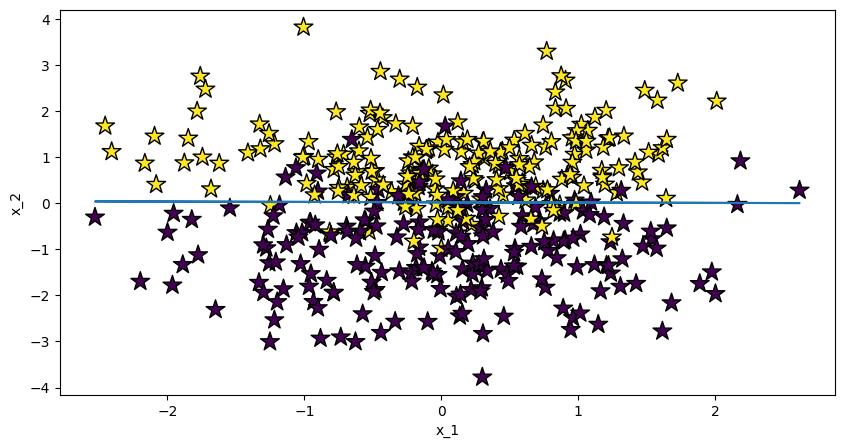

In [30]:
X, y = make_classification(n_samples = 400, n_classes=2, n_features=2, n_redundant=0,
                           n_informative = 1, n_clusters_per_class=1,
                           random_state = 30)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker='*', c=y, s=200, edgecolors='k')
plt.xlabel("x_1")
plt.ylabel('x_2')

W = log_reg.coef_

X_2 = -(W[0][0] * X[:,0] + log_reg.intercept_[0]) / W[0][1]
plt.plot(X[:,0], X_2)

plt.show()


### 모델 평가하기

In [31]:
log_reg.score(X,y)

0.8625

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
accuracy_score(y, log_reg.predict(X))

0.8625

In [34]:
precision_score(y, log_reg.predict(X))

0.8571428571428571

In [35]:
recall_score(y, log_reg.predict(X))

0.87

In [36]:
f1_score(y, log_reg.predict(X))

0.8635235732009926

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, log_reg.predict(X))

array([[171,  29],
       [ 26, 174]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       200
           1       0.86      0.87      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



### 다중분류

In [39]:
X, y = make_classification(n_samples=100, n_classes=3, n_features=2,
                           n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           random_state=30)



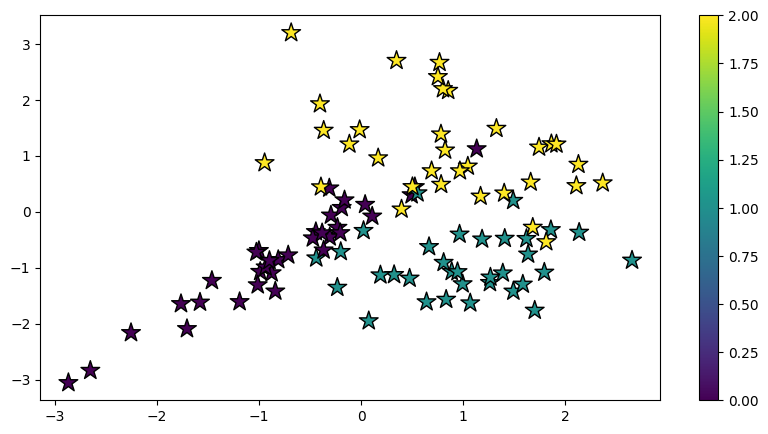

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker='*', c =y , edgecolors='k', s=200)
plt.colorbar()
plt.show()

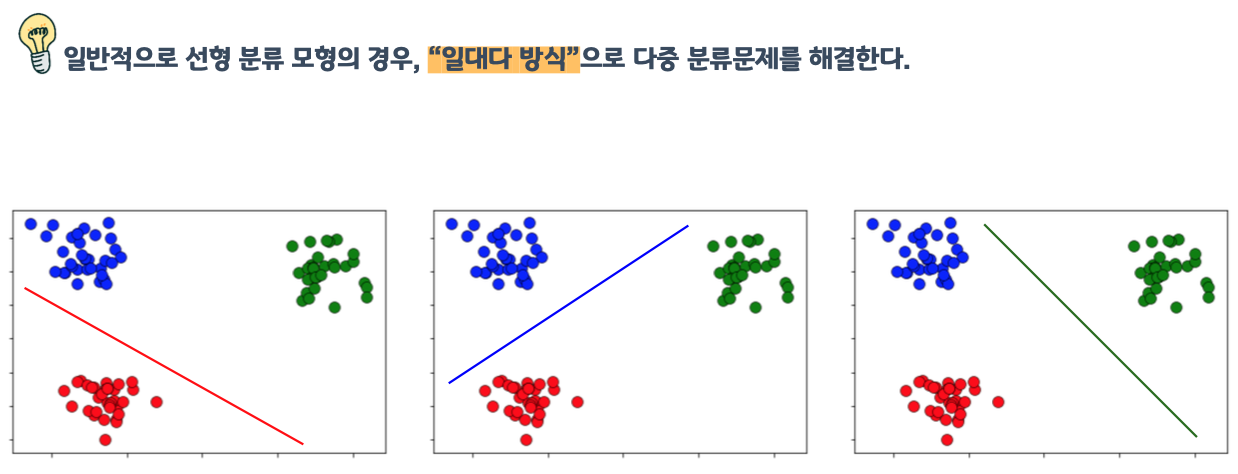

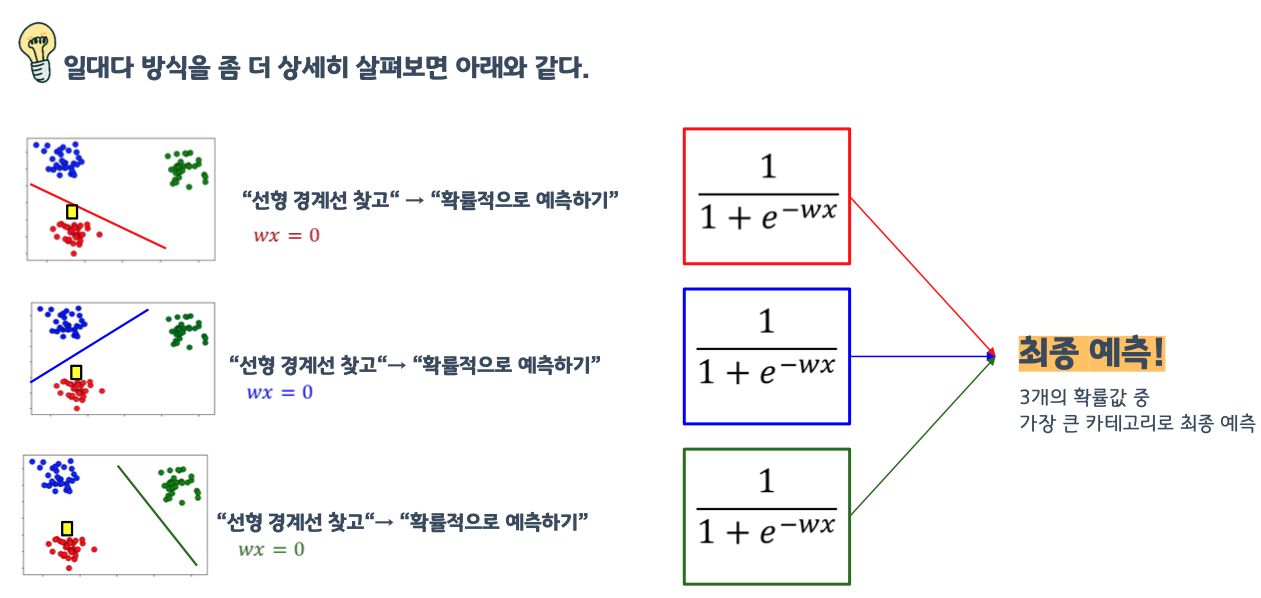

로지스틱 모델 객체를 생성하겠습니다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg = LogisticRegression()

In [47]:
log_reg.fit(X,y)

LogisticRegression()

In [48]:
log_reg.predict(X)[:10], y[:10]

(array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2]), array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2]))

In [49]:
log_reg.coef_

array([[-1.54071713, -0.14124702],
       [ 0.95132458, -1.73864618],
       [ 0.58939255,  1.8798932 ]])

In [50]:
log_reg.predict(X)

array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0])

In [52]:
log_reg.predict_proba(X)[:10]

array([[0.81478164, 0.12335051, 0.06186785],
       [0.75448261, 0.10295763, 0.14255976],
       [0.07931643, 0.24355557, 0.677128  ],
       [0.22249539, 0.00225624, 0.77524836],
       [0.00448681, 0.06068527, 0.93482792],
       [0.85140262, 0.14754973, 0.00104765],
       [0.73211376, 0.16616726, 0.10171898],
       [0.75156683, 0.18543458, 0.06299858],
       [0.00954254, 0.98523426, 0.0052232 ],
       [0.04691785, 0.04480007, 0.90828208]])

In [53]:
log_reg.predict_log_proba(X)[:10]

array([[-0.20483513, -2.09272528, -2.78275463],
       [-0.28172305, -2.27343769, -1.94799401],
       [-2.53431004, -1.41241014, -0.38989495],
       [-1.50284889, -6.09405432, -0.25457183],
       [-5.40661354, -2.80205422, -0.06739281],
       [-0.16087015, -1.91359001, -6.86120519],
       [-0.31181937, -1.7947604 , -2.28554135],
       [-0.28559514, -1.6850531 , -2.76464306],
       [-4.6519955 , -0.01487584, -5.25464491],
       [-3.05935711, -3.10554556, -0.09620029]])

In [54]:
log_reg.score(X,y)

0.88

In [55]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.93      0.85      0.89        33
           2       0.85      0.88      0.87        33

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



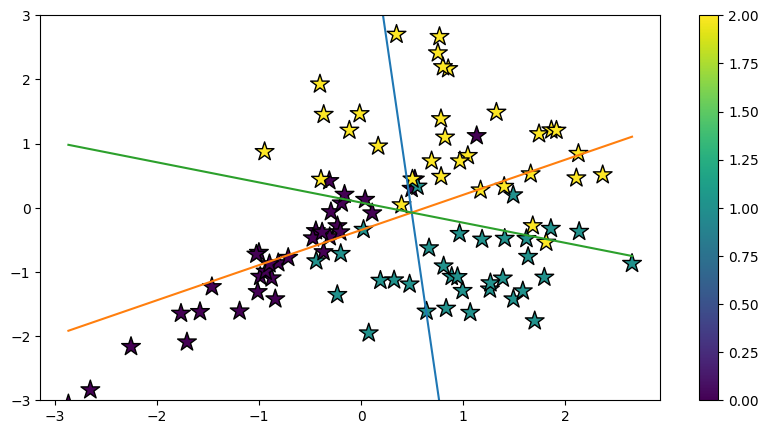

In [58]:
import numpy as np

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker='*', c=y, edgecolors='k', s=200)

W = log_reg.coef_

X_1 = np.linspace(X[:,0].min(), X[:,0].max())

for i in range(3):
    X_2 = -(W[i][0] * X_1 + log_reg.intercept_[i]) / W[i][1]
    plt.plot(X_1, X_2)

plt.ylim(-3,3)
plt.colorbar()
plt.show()

## 실제 데이터에 적용하기

## 모델 평가하기